In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This notebook will cover Exploratory Data Analysis for the **GridGenius Project**.

### To begin with, we will import the latest iteration of our custom dataset.

In [2]:
df = pd.read_csv('./extracted/energy_iter9.csv')
df.head(10)

,Date,DayPeakGen(MW),EveningPeakGen(MW),MaxDemand(MW),MaxGen(MW),Temp(C),Year,Month,Season,IsHoliday
0,2024-12-31,14543,14949,10600,14949,18.7,2024,12,lowTempSeason,No
1,2024-12-31,10596,11883,10100,11883,18.7,2024,12,lowTempSeason,No
2,2024-12-30,13760,15475,10800,15475,21.8,2024,12,lowTempSeason,No
3,2024-12-29,14372,14729,10800,14729,21.2,2024,12,lowTempSeason,No
4,2024-12-28,14138,14492,9850,14492,21.2,2024,12,lowTempSeason,No
5,2024-12-27,13791,14419,10600,14419,21.4,2024,12,lowTempSeason,Yes
6,2024-12-26,13645,14092,10600,14092,21.9,2024,12,lowTempSeason,No
7,2024-12-25,12982,13683,10500,13683,21.2,2024,12,lowTempSeason,No
8,2024-12-24,12696,13349,10700,13349,20.5,2024,12,lowTempSeason,No
9,2024-12-23,12705,13515,10700,13515,20.4,2024,12,lowTempSeason,No


### Dropping reduntant columns:

In [3]:
df = df.drop(columns=['DayPeakGen(MW)', 'EveningPeakGen(MW)'])
df.head(10)

,Date,MaxDemand(MW),MaxGen(MW),Temp(C),Year,Month,Season,IsHoliday
0,2024-12-31,10600,14949,18.7,2024,12,lowTempSeason,No
1,2024-12-31,10100,11883,18.7,2024,12,lowTempSeason,No
2,2024-12-30,10800,15475,21.8,2024,12,lowTempSeason,No
3,2024-12-29,10800,14729,21.2,2024,12,lowTempSeason,No
4,2024-12-28,9850,14492,21.2,2024,12,lowTempSeason,No
5,2024-12-27,10600,14419,21.4,2024,12,lowTempSeason,Yes
6,2024-12-26,10600,14092,21.9,2024,12,lowTempSeason,No
7,2024-12-25,10500,13683,21.2,2024,12,lowTempSeason,No
8,2024-12-24,10700,13349,20.5,2024,12,lowTempSeason,No
9,2024-12-23,10700,13515,20.4,2024,12,lowTempSeason,No


### Encoding Season:

In [4]:
df['Season'] = df['Season'].map({ 'highTempSeason': 1, 'lowTempSeason': 0 })
df.head(10)

,Date,MaxDemand(MW),MaxGen(MW),Temp(C),Year,Month,Season,IsHoliday
0,2024-12-31,10600,14949,18.7,2024,12,0,No
1,2024-12-31,10100,11883,18.7,2024,12,0,No
2,2024-12-30,10800,15475,21.8,2024,12,0,No
3,2024-12-29,10800,14729,21.2,2024,12,0,No
4,2024-12-28,9850,14492,21.2,2024,12,0,No
5,2024-12-27,10600,14419,21.4,2024,12,0,Yes
6,2024-12-26,10600,14092,21.9,2024,12,0,No
7,2024-12-25,10500,13683,21.2,2024,12,0,No
8,2024-12-24,10700,13349,20.5,2024,12,0,No
9,2024-12-23,10700,13515,20.4,2024,12,0,No


### Encoding Holiday:

In [5]:
df['IsHoliday'] = df['IsHoliday'].map({ 'Yes': 1, 'No': 0 })
df.head(10)

,Date,MaxDemand(MW),MaxGen(MW),Temp(C),Year,Month,Season,IsHoliday
0,2024-12-31,10600,14949,18.7,2024,12,0,0
1,2024-12-31,10100,11883,18.7,2024,12,0,0
2,2024-12-30,10800,15475,21.8,2024,12,0,0
3,2024-12-29,10800,14729,21.2,2024,12,0,0
4,2024-12-28,9850,14492,21.2,2024,12,0,0
5,2024-12-27,10600,14419,21.4,2024,12,0,1
6,2024-12-26,10600,14092,21.9,2024,12,0,0
7,2024-12-25,10500,13683,21.2,2024,12,0,0
8,2024-12-24,10700,13349,20.5,2024,12,0,0
9,2024-12-23,10700,13515,20.4,2024,12,0,0


### Renaming Columns for ease of Understanding:

In [6]:
df = df.rename(columns={'MaxDemand(MW)': 'Demand(MW)', 'MaxGen(MW)': 'Generation(MW)'})
df.head(10)

,Date,Demand(MW),Generation(MW),Temp(C),Year,Month,Season,IsHoliday
0,2024-12-31,10600,14949,18.7,2024,12,0,0
1,2024-12-31,10100,11883,18.7,2024,12,0,0
2,2024-12-30,10800,15475,21.8,2024,12,0,0
3,2024-12-29,10800,14729,21.2,2024,12,0,0
4,2024-12-28,9850,14492,21.2,2024,12,0,0
5,2024-12-27,10600,14419,21.4,2024,12,0,1
6,2024-12-26,10600,14092,21.9,2024,12,0,0
7,2024-12-25,10500,13683,21.2,2024,12,0,0
8,2024-12-24,10700,13349,20.5,2024,12,0,0
9,2024-12-23,10700,13515,20.4,2024,12,0,0


### Calculate the gap between Demand and Generation and model it as a separate feature:

In [7]:
df['DemandGenGap(MW)'] = df['Generation(MW)'] - df['Demand(MW)']

## **Basic dataset info:**

In [8]:
df.head(10)

,Date,Demand(MW),Generation(MW),Temp(C),Year,Month,Season,IsHoliday,DemandGenGap(MW)
0,2024-12-31,10600,14949,18.7,2024,12,0,0,4349
1,2024-12-31,10100,11883,18.7,2024,12,0,0,1783
2,2024-12-30,10800,15475,21.8,2024,12,0,0,4675
3,2024-12-29,10800,14729,21.2,2024,12,0,0,3929
4,2024-12-28,9850,14492,21.2,2024,12,0,0,4642
5,2024-12-27,10600,14419,21.4,2024,12,0,1,3819
6,2024-12-26,10600,14092,21.9,2024,12,0,0,3492
7,2024-12-25,10500,13683,21.2,2024,12,0,0,3183
8,2024-12-24,10700,13349,20.5,2024,12,0,0,2649
9,2024-12-23,10700,13515,20.4,2024,12,0,0,2815


In [9]:
df.describe()

,Demand(MW),Generation(MW),Temp(C),Year,Month,Season,IsHoliday,DemandGenGap(MW)
count,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000,1644.000000
mean,12282.137470,14120.095499,27.233090,2022.167883,6.858881,0.675791,0.145985,1837.958029
std,1979.530122,1532.989559,3.811737,1.332597,3.405918,0.468221,0.353199,1581.141212
min,7800.000000,9482.000000,14.000000,2020.000000,1.000000,0.000000,0.000000,-2435.000000
25%,10600.000000,13169.750000,24.800000,2021.000000,4.000000,0.000000,0.000000,621.750000
50%,12400.000000,14440.500000,28.600000,2022.000000,7.000000,1.000000,0.000000,1772.000000
75%,13900.000000,15200.250000,30.000000,2023.000000,10.000000,1.000000,0.000000,3017.250000
max,17300.000000,17638.000000,33.800000,2024.000000,12.000000,1.000000,1.000000,6587.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1644 entries, 0 to 1643
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1644 non-null   object 
 1   Demand(MW)        1644 non-null   int64  
 2   Generation(MW)    1644 non-null   int64  
 3   Temp(C)           1644 non-null   float64
 4   Year              1644 non-null   int64  
 5   Month             1644 non-null   int64  
 6   Season            1644 non-null   int64  
 7   IsHoliday         1644 non-null   int64  
 8   DemandGenGap(MW)  1644 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 115.7+ KB


### Checking for duplicates:

In [11]:
duplicates = df.duplicated()
duplicates.any()

np.False_

### Checking for null values:

In [12]:
null_values = df.isnull().sum()
null_values

Date                0
Demand(MW)          0
Generation(MW)      0
Temp(C)             0
Year                0
Month               0
Season              0
IsHoliday           0
DemandGenGap(MW)    0
dtype: int64

#### Since we may not be able to fully check for duplicates with library functions (as we want to avoid repeated dates), we will check with other means.

### Visualization settings:

In [13]:
plt.style.use('dark_background')
sns.set_palette(palette='gnuplot2_r')

### We will check the distribution of dates and see if there are any repeated values. If it is completely even, then there are no repeated dates.

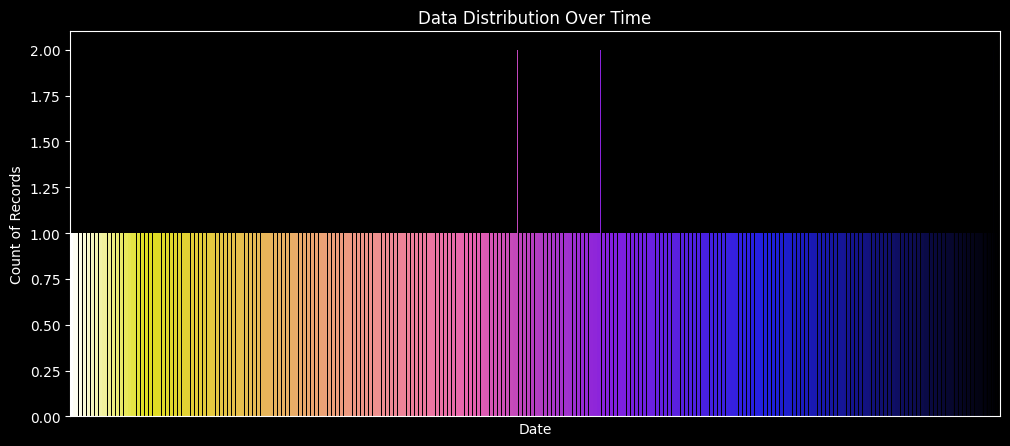

In [14]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Count the number of entries each day
daily_counts = df.groupby(df['Date'].dt.date).size()

# Actual Plot
plt.figure(figsize=(12, 5))
sns.barplot(x=daily_counts.index, y=daily_counts.values, hue=daily_counts.index, palette='gnuplot2_r', legend=False)

# Axis, Labels, and other Settings
plt.title("Data Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Count of Records")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.show()

### Analysis: We can clearly see repeated records for a few dates. We will now find them and get rid of them manually.

In [15]:
# Getting the repeated dates
repeated_dates = df[df['Date'].duplicated(keep=False)]
repeated_dates

,Date,Demand(MW),Generation(MW),Temp(C),Year,Month,Season,IsHoliday,DemandGenGap(MW)
0,2024-12-31,10600,14949,18.7,2024,12,0,0,4349
1,2024-12-31,10100,11883,18.7,2024,12,0,0,1783
11,2024-12-21,9800,13670,20.1,2024,12,0,0,3870
12,2024-12-21,9200,13812,20.1,2024,12,0,0,4612
13,2024-12-19,10500,14223,20.3,2024,12,0,0,3723
14,2024-12-19,10500,14157,20.3,2024,12,0,0,3657
703,2023-01-03,10400,11259,19.5,2023,1,0,0,859
704,2023-01-03,9800,10061,19.5,2023,1,0,0,261
705,2023-01-02,9800,10145,20.0,2023,1,0,0,345
706,2023-01-02,10400,11299,20.0,2023,1,0,0,899


### We can see here that certain instances of date had been repeated, but were not caught by the library function as they contained different values of Demand and Generation. We will drop the instances with smaller values.

In [16]:
# Manually picking and dropping repeated dates, 
indices_to_drop = [1, 11, 13, 703, 705, 708, 855, 1072]

df = df.drop(indices_to_drop)
df = df.reset_index(drop=True)

df.head(10)

,Date,Demand(MW),Generation(MW),Temp(C),Year,Month,Season,IsHoliday,DemandGenGap(MW)
0,2024-12-31,10600,14949,18.7,2024,12,0,0,4349
1,2024-12-30,10800,15475,21.8,2024,12,0,0,4675
2,2024-12-29,10800,14729,21.2,2024,12,0,0,3929
3,2024-12-28,9850,14492,21.2,2024,12,0,0,4642
4,2024-12-27,10600,14419,21.4,2024,12,0,1,3819
5,2024-12-26,10600,14092,21.9,2024,12,0,0,3492
6,2024-12-25,10500,13683,21.2,2024,12,0,0,3183
7,2024-12-24,10700,13349,20.5,2024,12,0,0,2649
8,2024-12-23,10700,13515,20.4,2024,12,0,0,2815
9,2024-12-22,10600,14032,19.8,2024,12,0,0,3432


### Visualizing the distribution again:

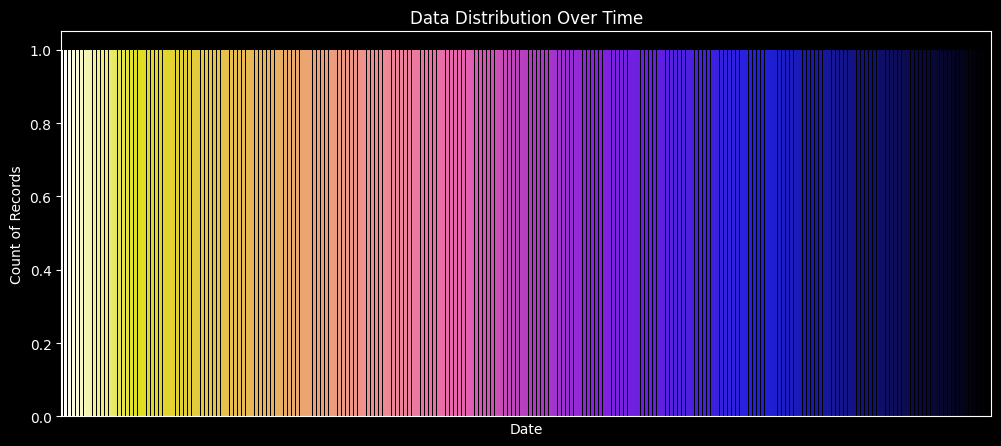

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

daily_counts = df.groupby(df['Date'].dt.date).size()

plt.figure(figsize=(12, 5))
sns.barplot(x=daily_counts.index, y=daily_counts.values, hue=daily_counts.index, palette='gnuplot2_r', legend=False)

plt.title("Data Distribution Over Time")
plt.xlabel("Date")
plt.ylabel("Count of Records")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.savefig('./generated/1.png', dpi=500)
plt.show()


### Anlysis: Here, we can see no repeated values, which means we now have no repeated dates.

### Saving the new, cleaned dataset iteration:

In [18]:
df.to_csv('./extracted/energy_iter11.csv', index=False)

## **Beginning Visualization:**

### We will now generate a pair-plot for all features paired with each other, to get an overview of our datset:

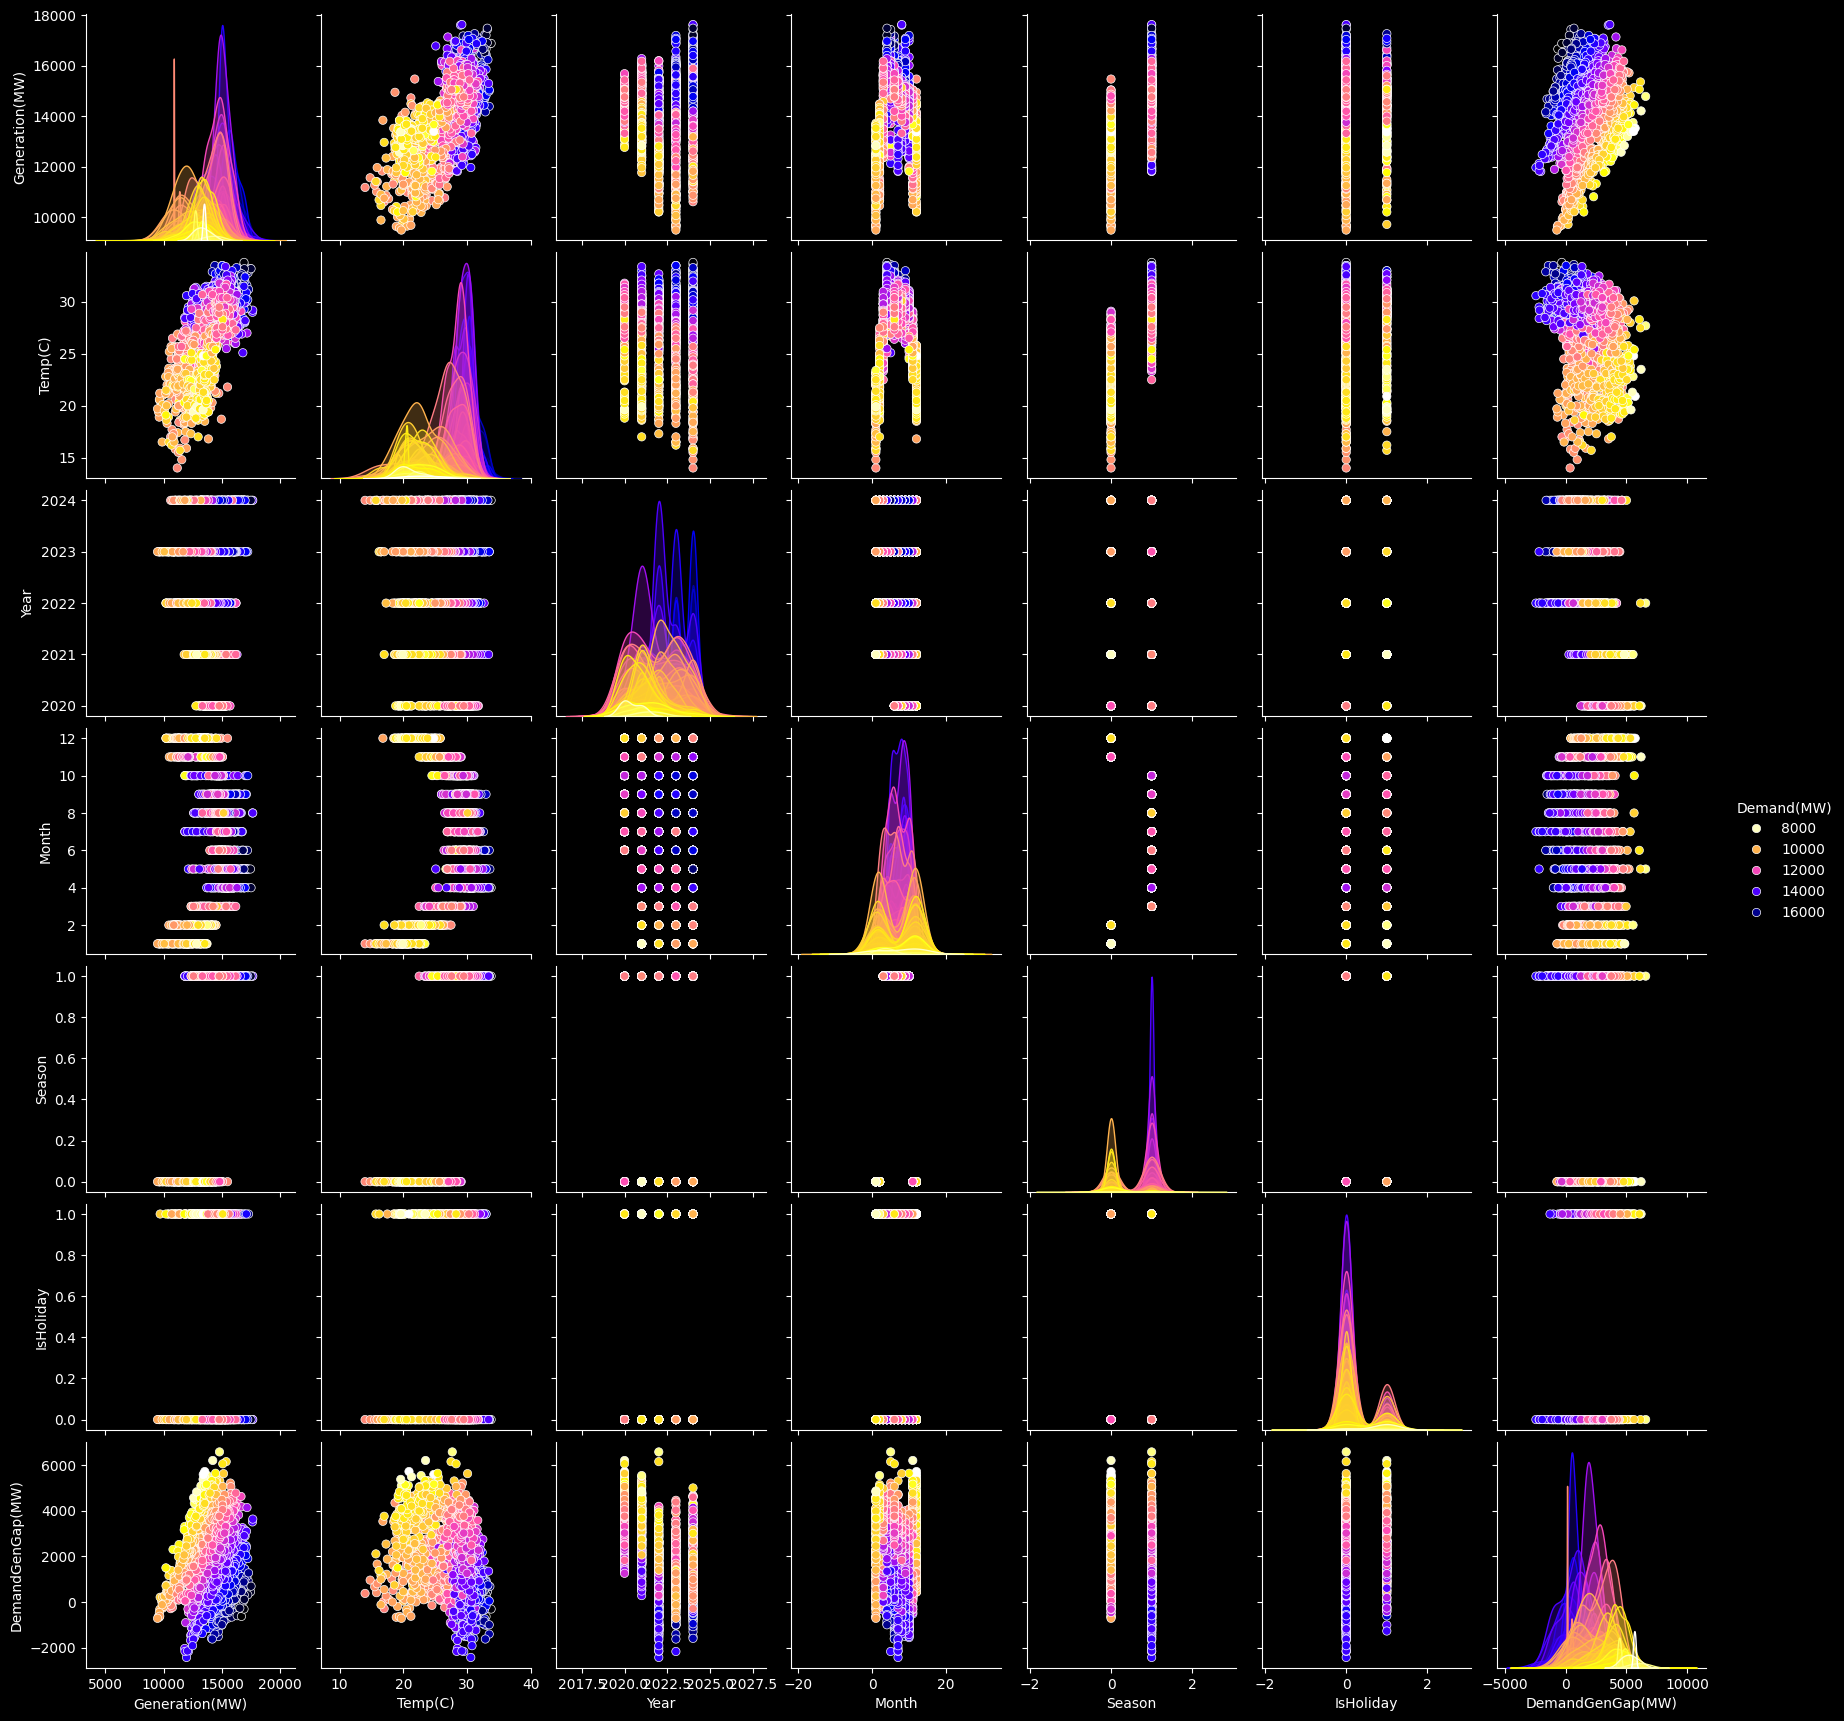

In [19]:
sns.pairplot(df, hue='Demand(MW)', palette='gnuplot2_r')
plt.savefig('./generated/2.png', dpi=500)

### Analysis: Noteworthy graphs include the Generation with Temperature, where we can see an upward trend of both Generation and Demand going up as Temperature rises.

In [20]:
# sns.set_theme(palette="gnuplot")

### Next, we will visualize distributions of all the Numerical Features of our Dataset:

### Energy Demand Distribution:

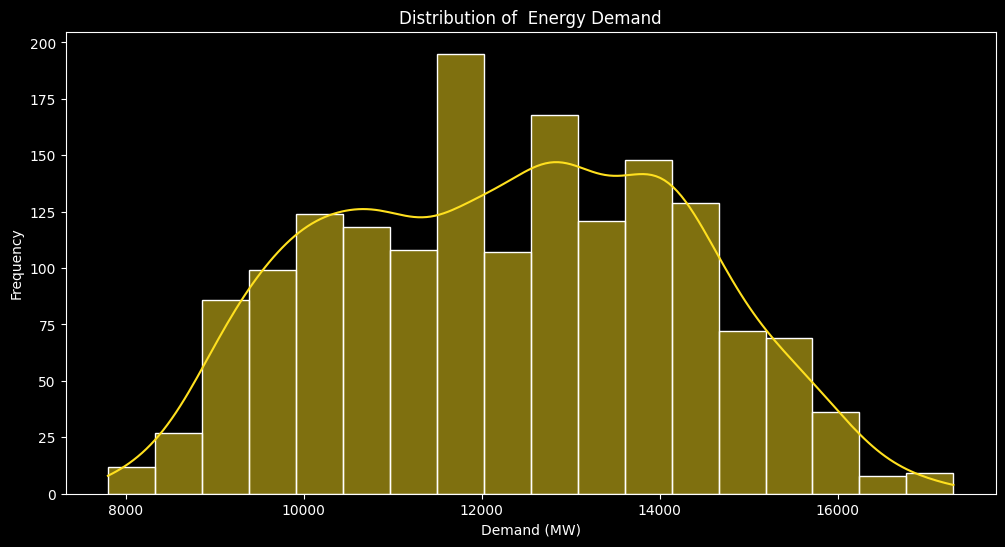

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Demand(MW)', kde=True)
plt.title('Distribution of  Energy Demand')
plt.xlabel('Demand (MW)')
plt.ylabel('Frequency')
plt.savefig('./generated/3.png', dpi=500)
plt.show()

### Analysis: The Distribution appears to be quite spread out, although skewing a bit to the right, indicating higher overall energy demand. The most frequent Energy Demanded amount ranges from around 12000~14000 MW.

### Energy Generation Distribution:

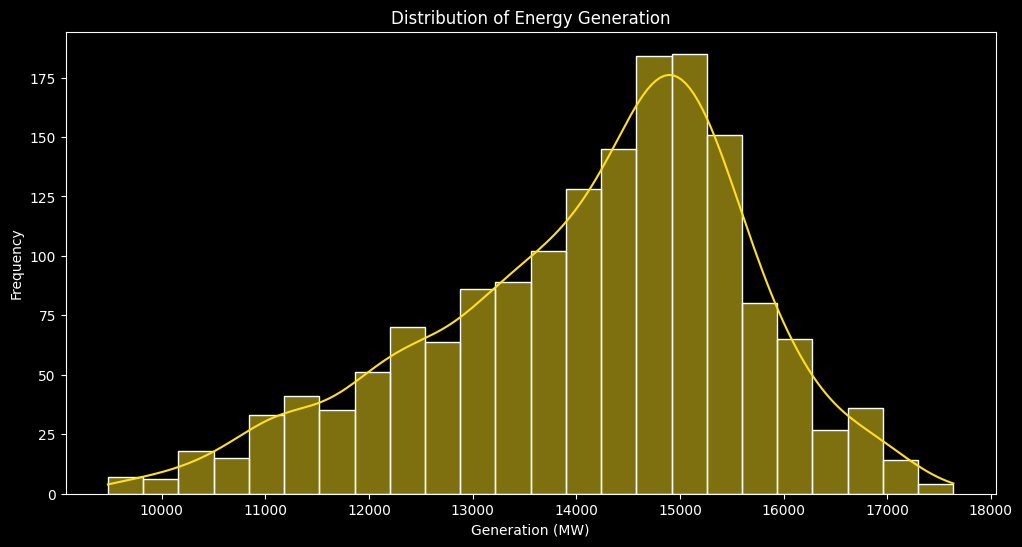

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Generation(MW)', kde=True)
plt.title('Distribution of Energy Generation')
plt.xlabel('Generation (MW)')
plt.ylabel('Frequency')
plt.savefig('./generated/4.png', dpi=500)
plt.show()

### Analysis: Visualization of the Energy Generation reveals a Normal Distribution with a clear skew to the right, indicating, again, a higher frequency of Energy Generation, with the most frequent value being around 15000 MW.

### Temperature Distribution:

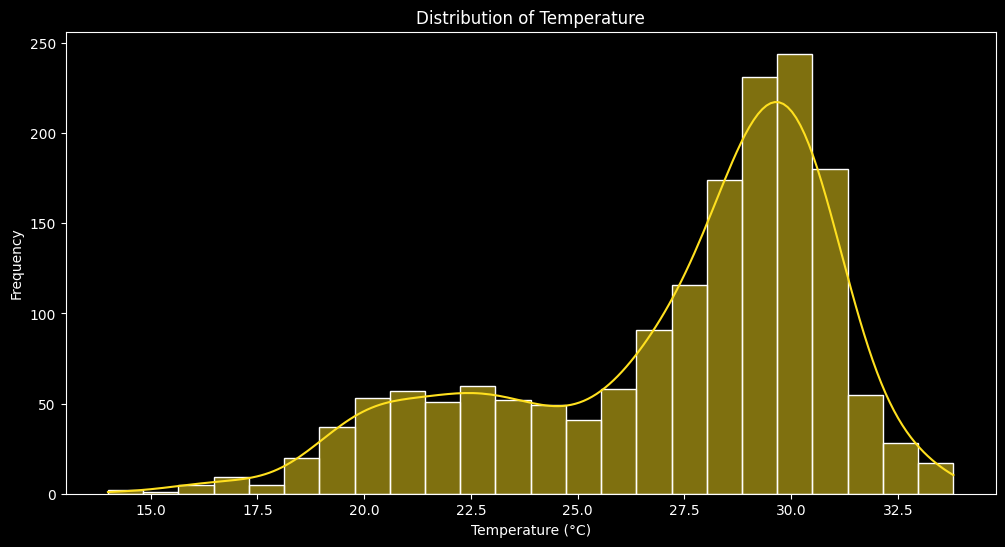

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Temp(C)', kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.savefig('./generated/5.png', dpi=500)
plt.show()

### Analysis: The distribution reveals the most frequent temperature range in Bangladesh to be around 28~31 degrees Celcius.

### Up next, we will visualize bar charts of all the Categorical Features of our Dataset:

### Different records by Season:

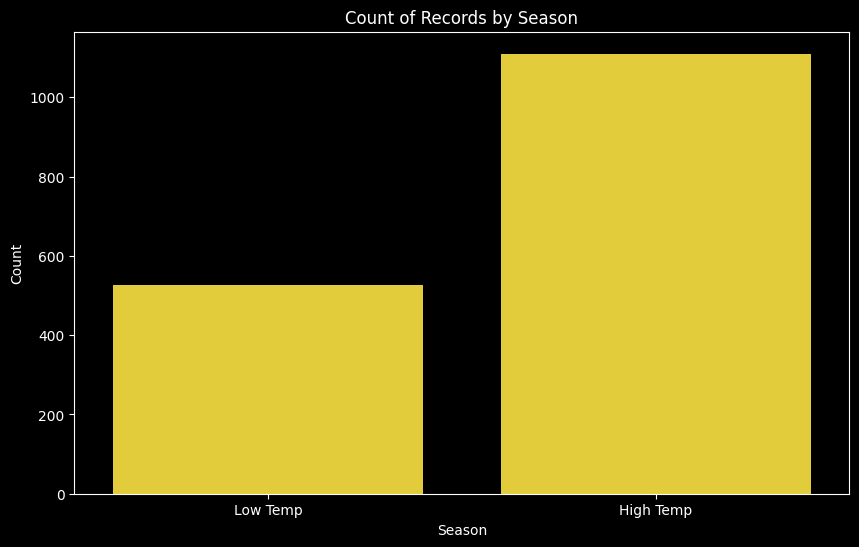

In [24]:
df['Season'] = df['Season'].map({0: 'Low Temp', 1: 'High Temp'})

plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=df)

plt.title('Count of Records by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.savefig('./generated/6.png', dpi=500)
plt.show()

### Analysis: We can see more records being present for Higher Temperature Seasons, indicating that Bangladesh maintains a relatively moderate~high temperature for most of the year.

### Different records by Holiday Status:

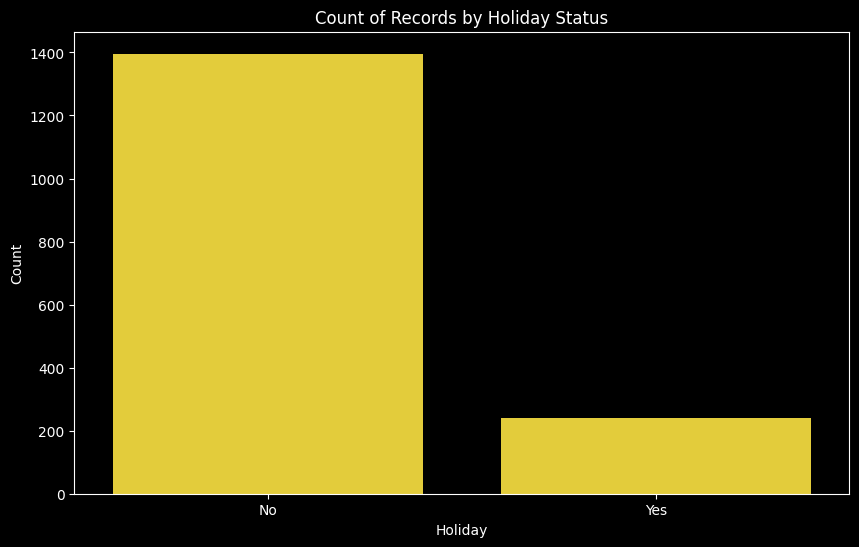

In [25]:
df['IsHoliday'] = df['IsHoliday'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(10, 6))
sns.countplot(x='IsHoliday', data=df)

plt.title('Count of Records by Holiday Status')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.savefig('./generated/7.png', dpi=500)
plt.show()

### Analysis: Although it may appear to be biased, it does make sense that there would be less Holidays compared to work days in our dataset. This feature is very important as it will help us in predicting spiking Demand on Holidays where people tend to remain at Home.

### Now, we will visualize Box Plots of our important Numerical Features to better understand the average, and different quartiles in the dataset:

### Box Plot of Temperature:

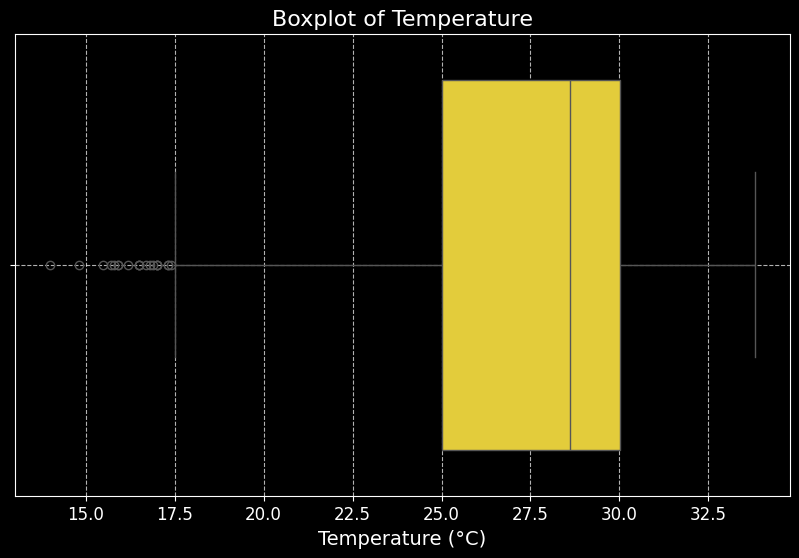

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Temp(C)')
plt.title('Boxplot of Temperature', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('./generated/8.png', dpi=500)
plt.show()

### Anaylsis: We can see the average Temperature being around 28.75°C or 29°C, with the lower quartile at 25°C and upper quartile at 30°C.

### Box Plot of Energy Demanded:

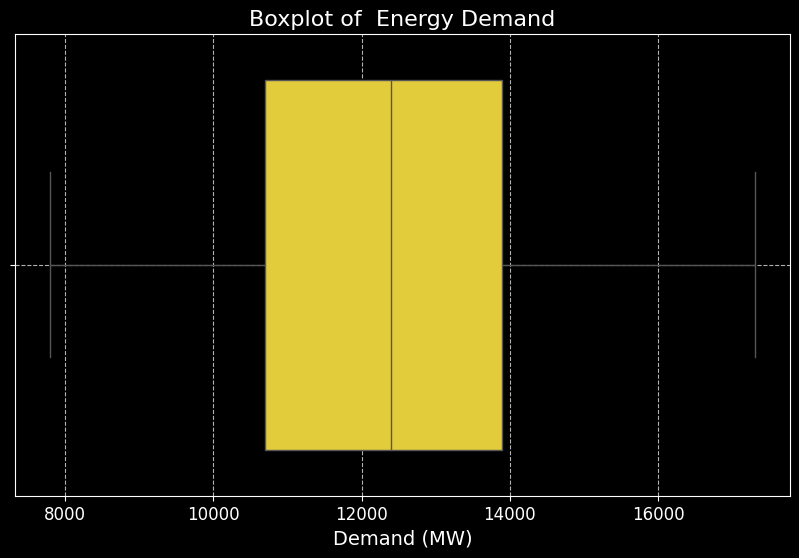

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Demand(MW)')
plt.title('Boxplot of  Energy Demand', fontsize=16)
plt.xlabel('Demand (MW)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('./generated/9.png', dpi=500)
plt.show()

### Anaylsis: We can see the average Energy Demand being around 12500 MW, with the lower quartile at 10500 MW and upper quartile close to 14000 MW.

### Box Plot of Energy Generated:

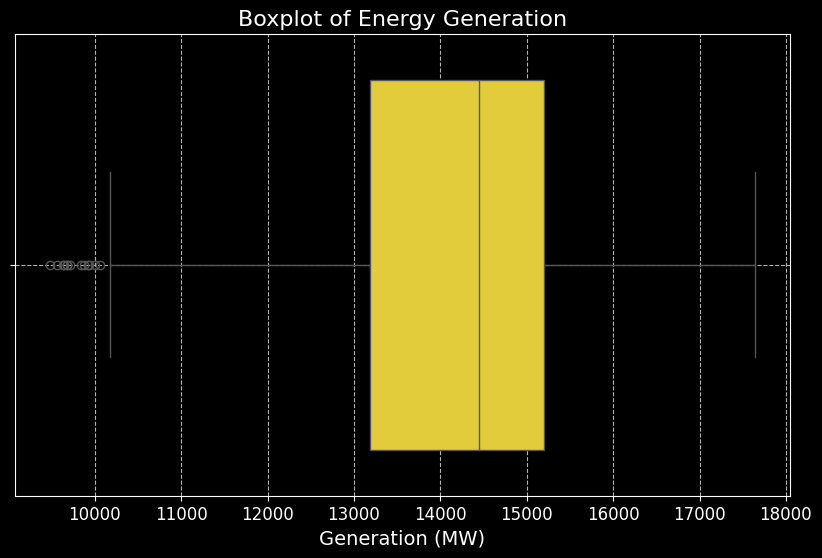

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Generation(MW)')
plt.title('Boxplot of Energy Generation', fontsize=16)
plt.xlabel('Generation (MW)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('./generated/10.png', dpi=500)
plt.show()

### Anaylsis: We can see the average Energy Generation being around 14500 MW, with the lower quartile at 13200 MW and upper quartile close to 15200 MW.

### Now, we will generate other relevant visualizations to gain a deeper understanding of our dataset:

### Visualizing Energy Demand and Generation with Time:

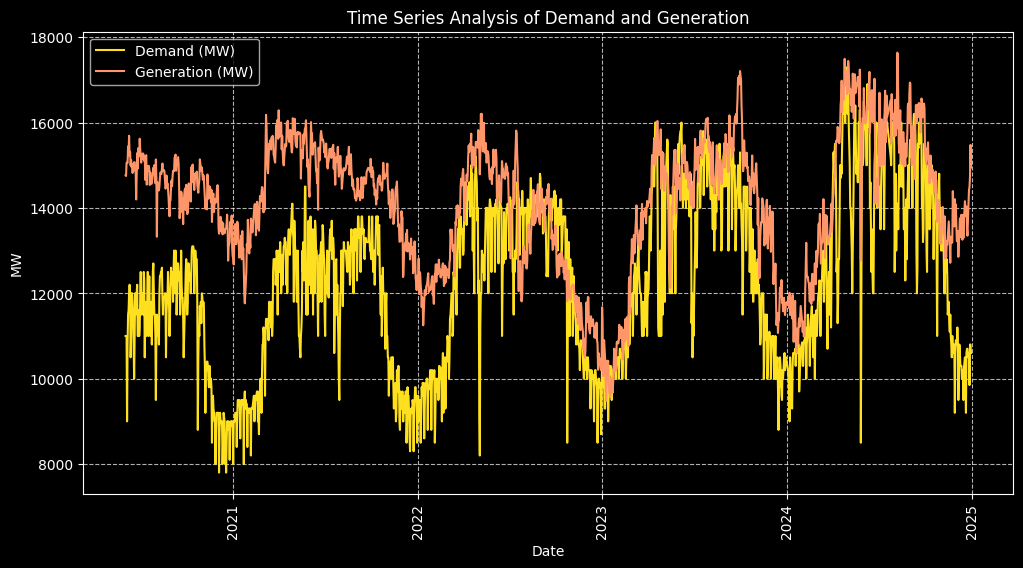

In [29]:
plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['Demand(MW)'], label='Demand (MW)')
plt.plot(df['Date'], df['Generation(MW)'], label='Generation (MW)')

plt.title('Time Series Analysis of Demand and Generation')
plt.xlabel('Date')
plt.ylabel('MW')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('./generated/11.png', dpi=500)
plt.show()

### Analysis: We can see that both Energy Demand and Generation follow a repeating cyclic pattern, with the Lower Temp Seasons (around the beginning of every year) experiencing lesser Energy Demand, and the Higher Temp Seasons (around the middle of every year) experiencing much higher Energy Demand.
### We can also see that from around 2020 to 2022, there used to be quite a large gap between the Energy Demanded an the Energy Generated. While improvements have been made greatly heading into 2022, the gap that exists is still something we aim to optimize and solve with our project.

### Visualizing Energy Demand and Temperature with Time:

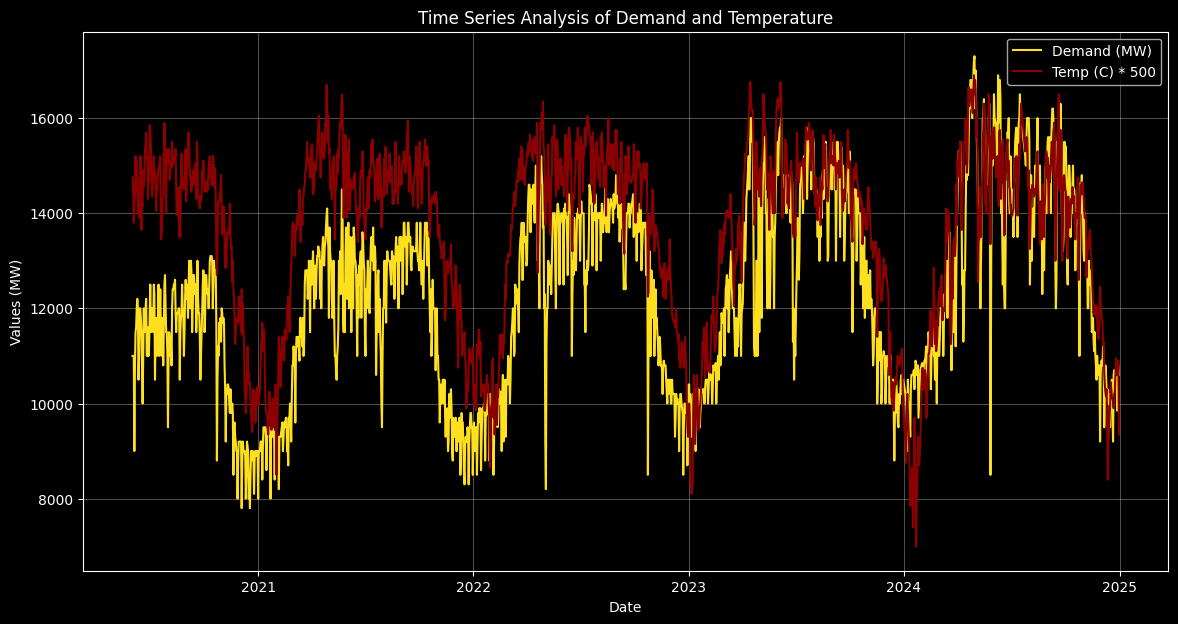

In [30]:
plt.figure(figsize=(14, 7))

plt.plot(df['Date'], df['Demand(MW)'], label='Demand (MW)')

# Scaling up Temperature to visualize with Energy Demand
plt.plot(df['Date'], df['Temp(C)'] * 500, label='Temp (C) * 500', color='darkred')

plt.title('Time Series Analysis of Demand and Temperature')
plt.xlabel('Date')
plt.ylabel('Values (MW)')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('./generated/12.png', dpi=500)
plt.show()

### Analysis: We can see a clear correlation between Energy Demanded and Temperature, with both following almost exactly similar cyclic patterns.

### Visualizing Energy Demand and Temperature with Seasonal Impact:

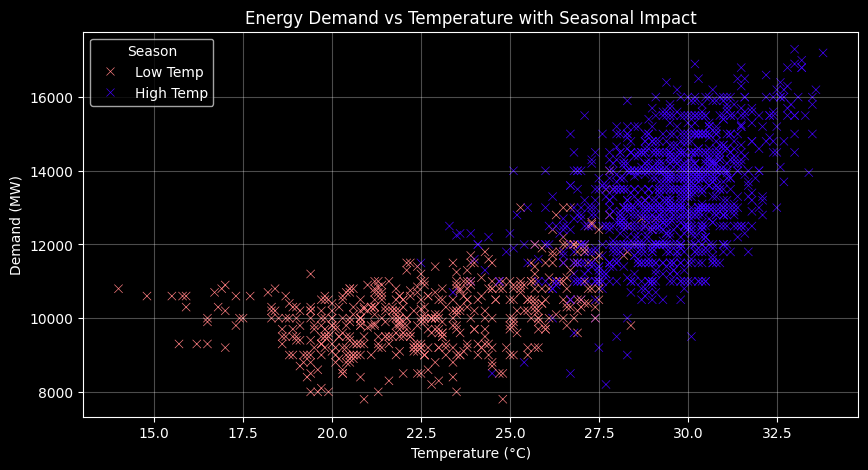

In [31]:
plt.figure(figsize=(10, 5))

sns.scatterplot(x='Temp(C)', y='Demand(MW)', hue='Season', data=df, palette='gnuplot2_r', marker='x')

plt.title('Energy Demand vs Temperature with Seasonal Impact')
plt.xlabel('Temperature (°C)')
plt.ylabel('Demand (MW)')
plt.grid(alpha=0.3)
plt.savefig('./generated/13.png', dpi=500)
plt.show()

### Analysis: Another way to visualize the correlation of Temperature with the Energy Demanded. We can see an Upward trend, with Energy Demand closely following increasing Temperature.

### Visualizing Box Plots of Energy Demand by Season:

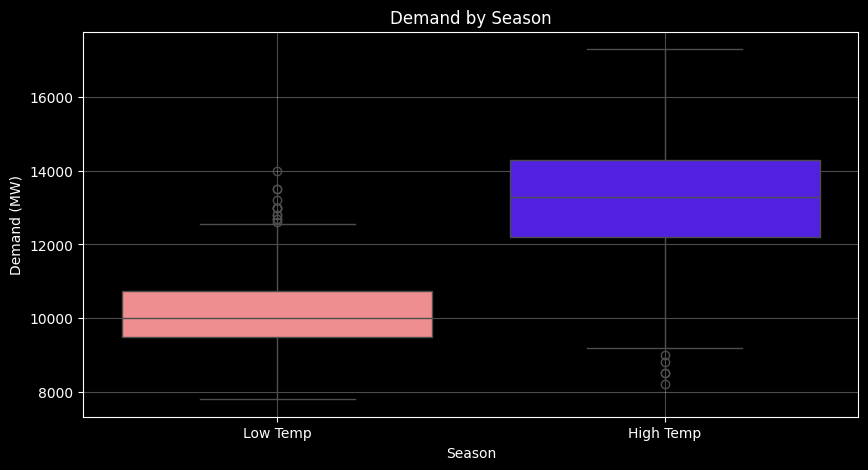

In [32]:
plt.figure(figsize=(10, 5))

sns.boxplot(x='Season', y='Demand(MW)', data=df, hue='Season', palette='gnuplot2_r')

plt.title('Demand by Season')
plt.xlabel('Season')
plt.ylabel('Demand (MW)')
plt.grid(alpha=0.3)
plt.savefig('./generated/14.png', dpi=500)
plt.show()

### Analysis: We can see the average Energy Demand in the Lower Temp Seasons (~10000 MW) being lower than the average Energy Demand in the Higher Temp Seasons (~13000 MW). The same is reflected for the upper and lower quartile of the Lower Temp and Higher Temp seasons.

### Visualizing Box Plots of Energy Demand on Holidays:

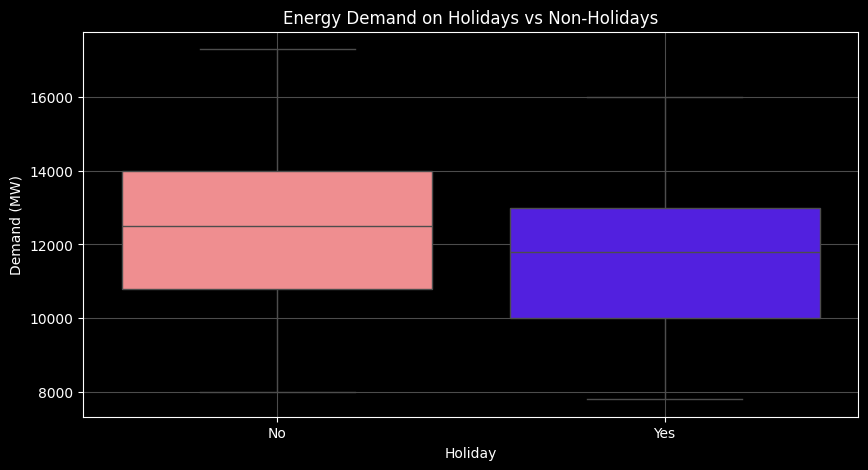

In [33]:
plt.figure(figsize=(10, 5))

sns.boxplot(x='IsHoliday', y='Demand(MW)', data=df, hue='IsHoliday', palette='gnuplot2_r')

plt.title('Energy Demand on Holidays vs Non-Holidays')
plt.ylabel('Demand (MW)')
plt.xlabel('Holiday')
plt.grid(alpha=0.3)
plt.savefig('./generated/15.png', dpi=500)
plt.show()

### Analysis: Here, unexpectedly, we can see that the Energy Demanded on Holidays is actually **lower** than on Non-Holidays. There are multiple explanations for this.
#### First off, most Holidays in Bangladesh tend to be centered around the end or beginning of the year, with Eid, Christmas, New Year's Eve, etc. all of which fall under the Lower Temp Seasons. Thus, naturally, Energy Demanded around that time is much lower.
#### Another explanation may be the fact that the energy demanded from factories, offices and industries are simply a lot higher compared to regular households, explaining the lower average Energy Demand on Holidays (when most factories and offices are closed).

### Visualizing the Gap between Energy Demand and Energy Generation:

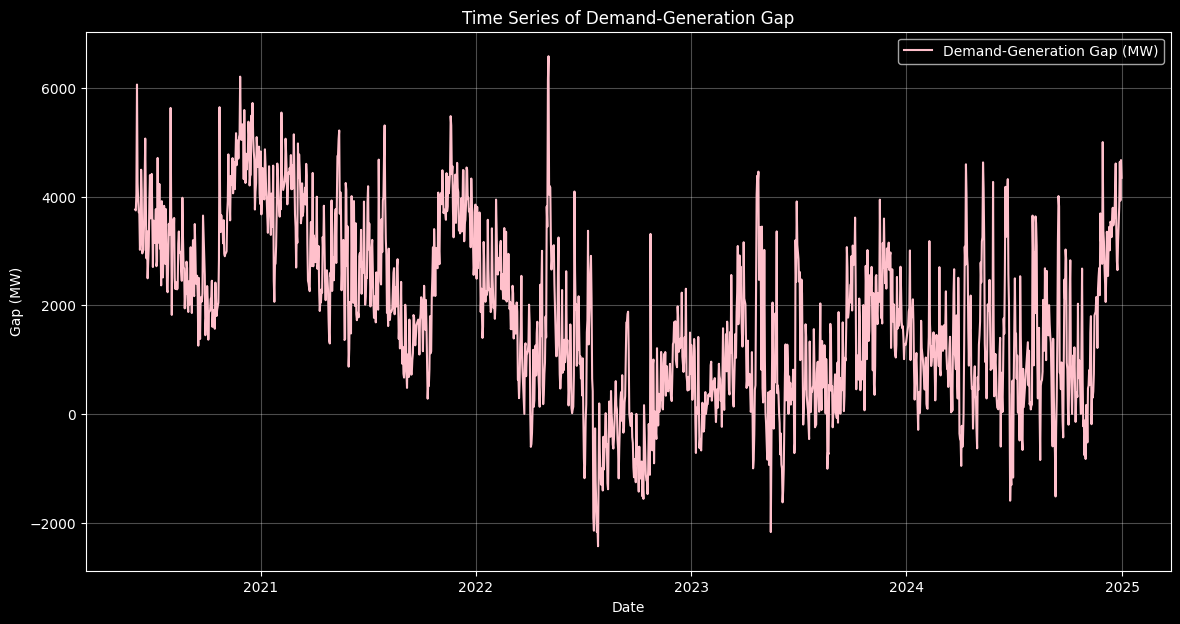

In [34]:

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['DemandGenGap(MW)'], label='Demand-Generation Gap (MW)', color='pink')
plt.title('Time Series of Demand-Generation Gap')
plt.xlabel('Date')
plt.ylabel('Gap (MW)')
plt.grid(alpha=0.3)
plt.legend()
plt.savefig('./generated/16.png', dpi=500)
plt.show()

### Analysis: As observed earlier, the gap in the Energy Demanded and Generated was much higher around 2020~2022, compared to present, although we can see an upward spike around the end, indicating the optimization strategies used earlier may no longer be ideal.

### Visualizing the Energy Demand and Generation Gap with Temperature:  

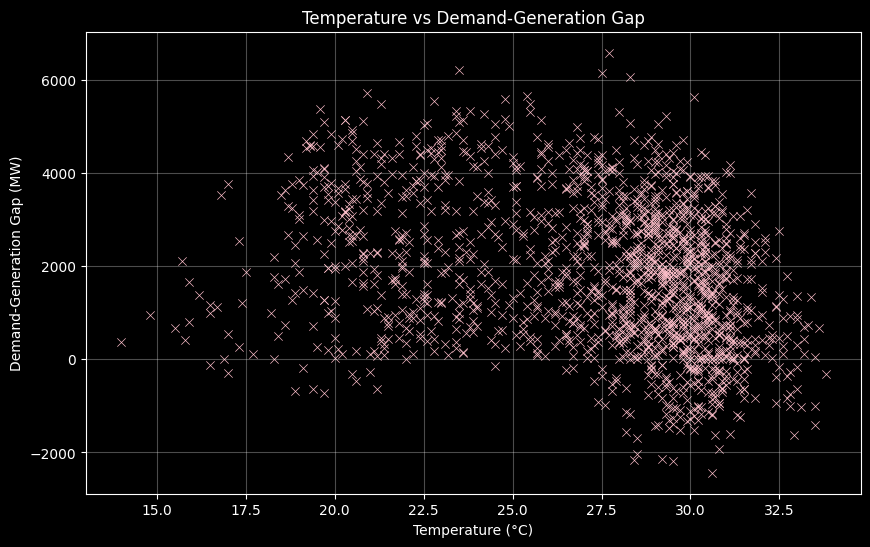

In [35]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Temp(C)', y='DemandGenGap(MW)', data=df, color='pink', marker='x')

plt.title('Temperature vs Demand-Generation Gap')
plt.xlabel('Temperature (°C)')
plt.ylabel('Demand-Generation Gap (MW)')
plt.grid(alpha=0.3)
plt.savefig('./generated/17.png', dpi=500)
plt.show()

### Analysis: We can see no clear correlation between Temperature and the Gap between Energy Demanded and Generated. Thus, whether Temperature effects efficiency of Energy Generated is inconclusive.

### Visualizing the Average Energy Demand and Generation Gaps across months of the year:

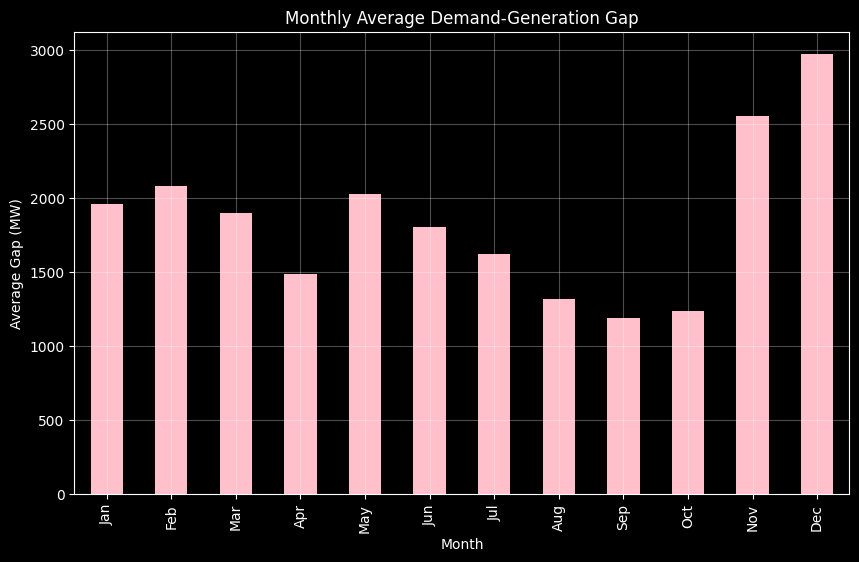

In [36]:
monthly_avg_gap = df.groupby('Month')['DemandGenGap(MW)'].mean()

plt.figure(figsize=(10, 6))

monthly_avg_gap.plot(kind='bar', color='pink')

plt.title('Monthly Average Demand-Generation Gap')
plt.xlabel('Month')
plt.xticks(ticks=np.arange(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Gap (MW)')
plt.grid(alpha=0.3)
plt.savefig('./generated/18.png', dpi=500)
plt.show()

### Analysis: It is clearly visible that around the Lower Temp Season (November~February), the Gap is higher than usual. This may indicate an inefficiency in the existing optimization system in failing to properly forecast Demand around Lower Temp Seasons.

### Visualizing average Monthly Energy Demand Trend:

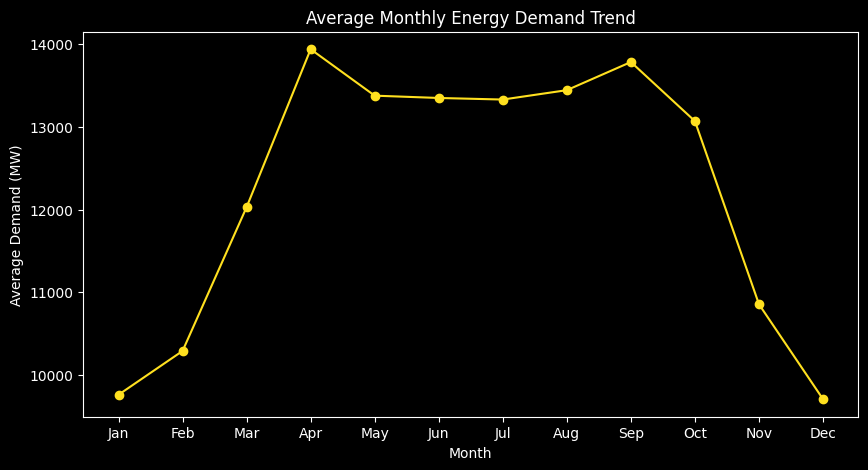

In [37]:
monthly_avg = df.groupby("Month")["Demand(MW)"].mean()

plt.figure(figsize=(10,5))

plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-')

plt.xlabel("Month")
plt.ylabel("Average Demand (MW)")
plt.title("Average Monthly Energy Demand Trend")
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig('./generated/19.png', dpi=500)
plt.show()

### Analysis: We can see, as expected the Energy Demand being higher around the Higher Temp Season (April~September), and lower at other times.

### Visualizing average Monthly Energy Generation Trend:

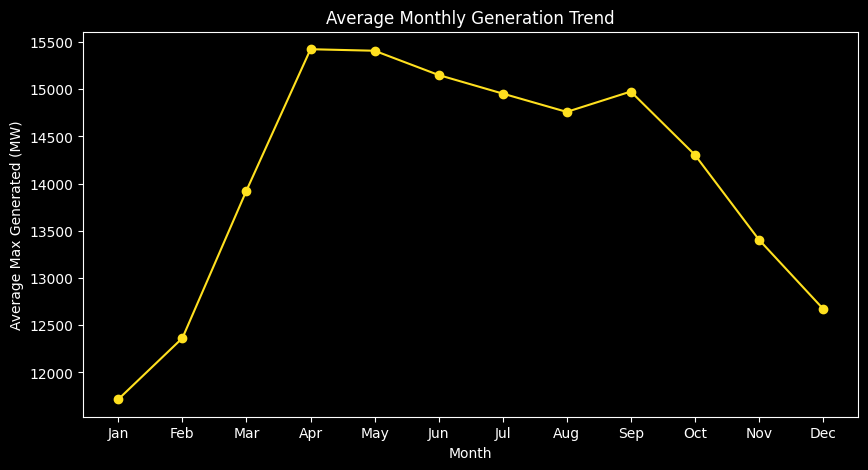

In [38]:
monthly_avg = df.groupby("Month")["Generation(MW)"].mean()
plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', linestyle='-')
plt.xlabel("Month")
plt.ylabel("Average Max Generated (MW)")
plt.title("Average Monthly Generation Trend")
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig('./generated/20.png', dpi=500)
plt.show()

### Analysis: Following similarly with the Energy Demand, we can see the Energy Generation being higher around the Higher Temp Season (April~September), and lower at other times, during the Lower Temp Season.

## **Finally, we will generate a Heatmap (Correlation Matrix) for our dataset:**

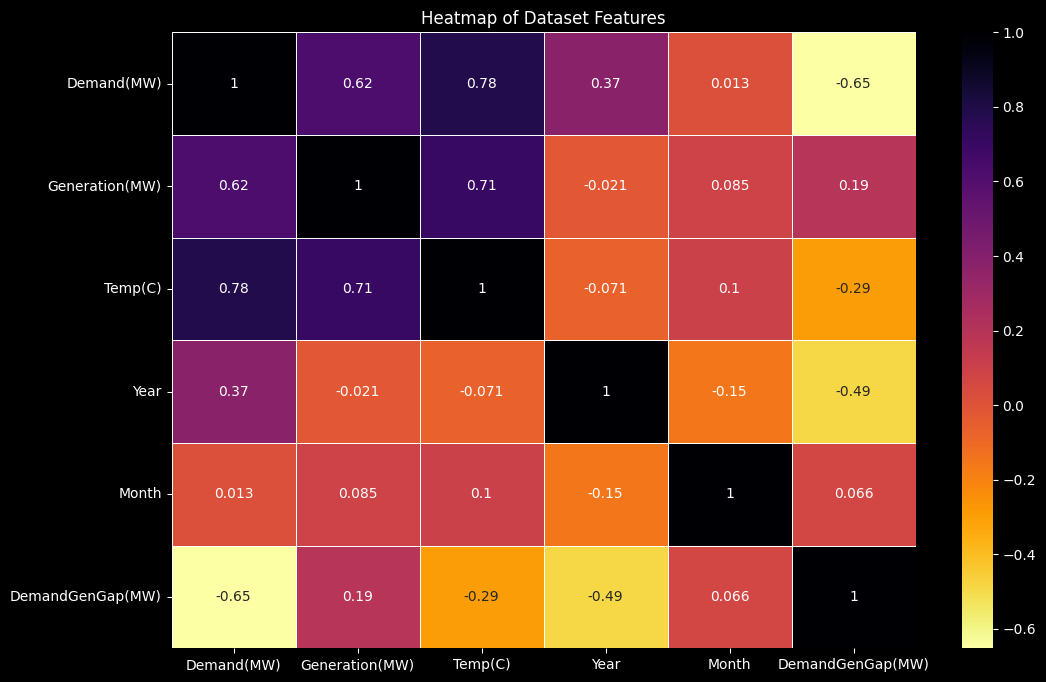

In [39]:
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number]) # Exclude non-numeric columns

sns.heatmap(numeric_df.corr(), annot=True, cmap='inferno_r', linewidths=0.5)
plt.title('Heatmap of Dataset Features')
plt.savefig('./generated/21.png', dpi=500)
plt.show()

### Analysis: Noteworthy Correlations include Temperature with Energy Demand (78%), and Energy Generation (71%). Another interesting correlation we can see is between Energy Demand and the Demand-Generation-Gap (-65%). This indicates that as the Energy Demand increases, the Demand-Generation-Gap decreases, which may prove to be useful information in training, as the current optimization method seems to be better at optimizing and predicting higher Energy Demand Values.

## **This begs the question, what would be the ideal Generated amount of Energy?**

### It cannot exactly predict and match Demand. In fact, it should not exactly match the Energy Demanded. We need to account for peak loads, emergency reserves, and prevent shortages and provide reliability. We may consider a margin of around 5% to 15% above the Energy Demanded, so in this case, we shall consider a 10% margin as ideal.

In [42]:
margin_percentage = 0.10

df['IdealGeneration(MW)'] = df['Demand(MW)'] * (1 + margin_percentage)
df['IdealGeneration(MW)'] = df['IdealGeneration(MW)'].round()

df.head(10)

,Date,Demand(MW),Generation(MW),Temp(C),Year,Month,Season,IsHoliday,DemandGenGap(MW),IdealGeneration(MW)
0,2024-12-31,10600,14949,18.7,2024,12,Low Temp,No,4349,11660.0
1,2024-12-30,10800,15475,21.8,2024,12,Low Temp,No,4675,11880.0
2,2024-12-29,10800,14729,21.2,2024,12,Low Temp,No,3929,11880.0
3,2024-12-28,9850,14492,21.2,2024,12,Low Temp,No,4642,10835.0
4,2024-12-27,10600,14419,21.4,2024,12,Low Temp,Yes,3819,11660.0
5,2024-12-26,10600,14092,21.9,2024,12,Low Temp,No,3492,11660.0
6,2024-12-25,10500,13683,21.2,2024,12,Low Temp,No,3183,11550.0
7,2024-12-24,10700,13349,20.5,2024,12,Low Temp,No,2649,11770.0
8,2024-12-23,10700,13515,20.4,2024,12,Low Temp,No,2815,11770.0
9,2024-12-22,10600,14032,19.8,2024,12,Low Temp,No,3432,11660.0


### Let's visualize this against the current actual Energy Generation:

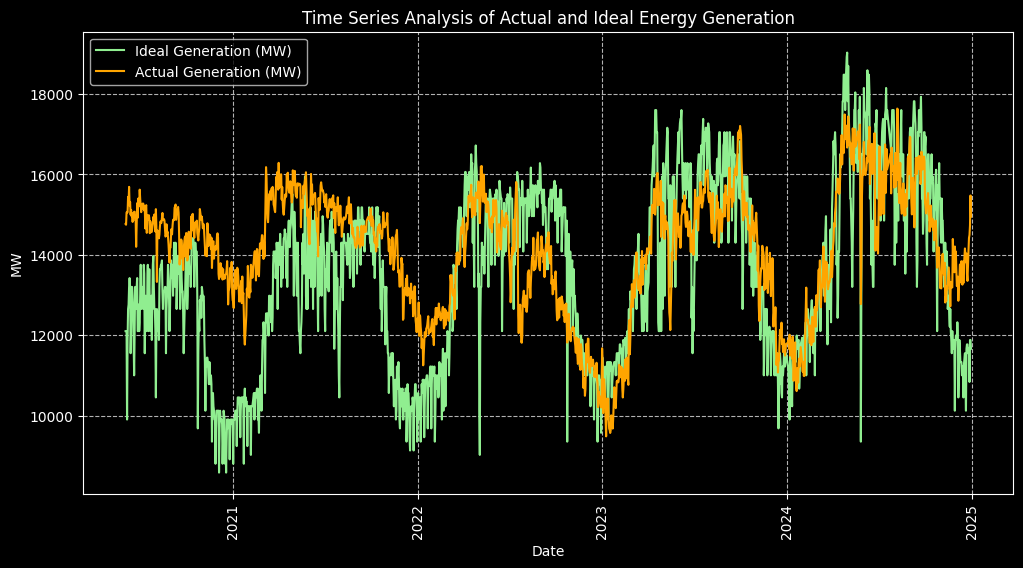

In [46]:
plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['IdealGeneration(MW)'], label='Ideal Generation (MW)', color='lightgreen')
plt.plot(df['Date'], df['Generation(MW)'], label='Actual Generation (MW)', color='orange')

plt.title('Time Series Analysis of Actual and Ideal Energy Generation')
plt.xlabel('Date')
plt.ylabel('MW')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('./generated/22.png', dpi=500)
plt.show()

### Analysis: As before, we see here how around 2020~2022, the Generation was not ideal, however, in recent times, it has become more efficient, with a spike above the ideal amount around the end of 2024. All of this indicates room for improvement, as the ideal Generation may also need to vary by counts of around 5%~15% (or otherwise) depending on the situation. All of this calls even more so for a more accurate way of being able to forecast Energy Demand.